In [541]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [683]:
df = pd.read_csv("data_v6.csv")

In [680]:
#Function to print summary statistics of data
def summ(X):
    print(f"\tMin: {min(X)}")
    print(f"\tQ1: {np.percentile(X,[25,50,75])[0]}")
    print(f"\tMedian: {np.percentile(X,[25,50,75])[1]}")
    print(f"\tMean: {round(sum(X)/len(X),1)}")    
    print(f"\tQ3: {np.percentile(X,[25,50,75])[2]}") 
    print(f"\tMax: {max(X)}")
print("Summary statistics of RegisteredCapital in DKK for 2758 Companies:")
summ(df["RegisteredCapital"])

Summary statistics of RegisteredCapital in DKK for 2758 Companies:
	Min: 50001.0
	Q1: 125000.0
	Median: 500000.0
	Mean: 803442.8
	Q3: 625000.0
	Max: 9292139.0


In [548]:
#Making a copy of the dataframe when changin "nan" to 0
dfc=df.copy()
for i in range(len(dfc)):
    if str(dfc["NumPeople"][i]) == "nan":
        dfc["NumPeople"][i] = 0
    if str(dfc["NumCars"][i]) == "nan":
        dfc["NumCars"][i] = 0

/home/julius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/julius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Sci-kit Learn used to analyse the data and create predictors

In [549]:
from sklearn.linear_model import LogisticRegression as Logistic
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [550]:
objects = dfc[["NumPeople","NumCars"]]
regcap = df["RegisteredCapital"]

In [655]:
#Checking the 80-20 rule
regcap_df = pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],regcap)))
regcap_df.columns =['NumCars', 'NumPeople', 'RegisteredCapital']
regcap_df = regcap_df.sort_values(by="RegisteredCapital",ignore_index=True)
top20 = regcap_df.loc[round(len(XY)*0.8):]
bottom80 = regcap_df.loc[:round(len(XY)*0.8)]
print(f"Total Registered Capital for the top 20% of companies: {top20['RegisteredCapital'].sum()} DKK")
print(f"Total Registered Capital for the bottom 80% of companies: {bottom80['RegisteredCapital'].sum()} DKK")
print(f"Total Registered Capital for the all companies: {regcap_df['RegisteredCapital'].sum()} DKK")
print(f"Proportion of capital that comes from the top 20%: {top20['RegisteredCapital'].sum()/regcap_df['RegisteredCapital'].sum()}")
#print(len(p20),len(p80),len(p20)/len(XY),len(p80)/len(XY))

Total Registered Capital for the top 20% of companies: 1184643895.38 DKK
Total Registered Capital for the bottom 80% of companies: 559023565.97 DKK
Total Registered Capital for the all companies: 1742667461.35 DKK
Proportion of capital that comes from the top 20%: 0.6797876942410382


In [552]:
#Define wealthy company as having more than 500,000
wealthy=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 500000:
        wealthy[i]=1
    else:
        wealthy[i]=0
print((len(wealthy)-len([n for n in wealthy if n==1]))/len(wealthy))

objects=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy)))
objects.columns =['NumCars', 'NumPeople', 'Wealthy']

0.6795758414015676


In [686]:
#logistic Regression
def mls(x,y):
    log = Logistic(class_weight="balanced",solver='lbfgs')
    log.fit(x,y)
    print(f"f1-score: {f1_score(y,log.predict(x))}")
    print(f"precision: {precision_score(y,log.predict(x))}")
    print(f"recall: {recall_score(y,log.predict(x))}")
    print(f"accuracy: {log.score(x,y)}")
print("Threshold: 500,000")
mls(objects[["NumCars","NumPeople"]],objects["Wealthy"])

Threshold: 500,000
f1-score: 0.4792758456407814
precision: 0.35826210826210825
recall: 0.7237410071942446
accuracy: 0.49608114338404796


## Removing some 0's

In [687]:
objects_detect=objects.loc[(objects["NumPeople"]!=0) | (objects["NumCars"]!=0)]
print(f"Proportion removed: {1-len(objects_detect)/len(objects)}")
X_d = objects_detect[["NumCars","NumPeople"]]
Y_d = objects_detect["Wealthy"]
print("Threshold: 500,000. No datapoints with nothing detected")
mls(X_d,Y_d)

Proportion removed: 0.28722913785154447
Threshold: 500,000. No datapoints with nothing detected
f1-score: 0.46758620689655167
precision: 0.3445121951219512
recall: 0.7274678111587983
accuracy: 0.500646830530401


## Different Threshholds

In [670]:
wealthy_25=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 250000:
        wealthy_25[i]=1
    else:
        wealthy_25[i]=0
print(f"Proporiton of wealthy companies 250,000: {len([n for n in wealthy_25 if n==1])/len(wealthy_25)}")

wealthy_mil=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 1000000:
        wealthy_mil[i]=1
    else:
        wealthy_mil[i]=0
print(f"Proporiton of wealthy companies 1,000,000: {len([n for n in wealthy_mil if n==1])/len(wealthy_mil)}")


#What if it's 500,000 or above?
wealthy_inclusive=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap >= 500000:
        wealthy_inclusive[i]=1
    else:
        wealthy_inclusive[i]=0
print(f"Proporiton of wealthy companies 500,000 inclusive: {len([n for n in wealthy_inclusive if n==1])/len(wealthy_inclusive)}")

Proporiton of wealthy companies 250,000: 0.5859843245735362
Proporiton of wealthy companies 1,000,000: 0.15352697095435686
Proporiton of wealthy companies 500,000 inclusive: 0.553711387736284


In [688]:
print("Threshold: 200000")
log2=mls(objects[["NumCars","NumPeople"]],wealthy2)
print("Threshold: 1000000")
mls(objects[["NumCars","NumPeople"]],wealthy3)
#print("10000000:")
#mls(objects[["NumCars","NumPeople"]],wealthy4)

Threshold: 200000
f1-score: 0.6729309721720275
precision: 0.6223262032085561
recall: 0.7324940991345398
accuracy: 0.582757030889811
Threshold: 1000000
f1-score: 0.27755568246716167
precision: 0.17136812411847674
recall: 0.7297297297297297
accuracy: 0.41678192715537116


In [673]:
def splitter(obje):
    """Splits the values of objects for the heatmap."""
    obj=[]
    obj.append(obje[(obje["NumCars"]<5) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]<5) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]<5) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>4) & (obje["NumCars"]<10) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>4) & (obje["NumCars"]<10) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>4) & (obje["NumCars"]<10) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>9) & (obje["NumCars"]<15) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>9) & (obje["NumCars"]<15) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>9) & (obje["NumCars"]<15) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>14) & (obje["NumCars"]<20) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>14) & (obje["NumCars"]<20) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>14) & (obje["NumCars"]<20) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>19) & (obje["NumCars"]<25) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>19) & (obje["NumCars"]<25) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>19) & (obje["NumCars"]<25) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>24) & (obje["NumCars"]<30) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>24) & (obje["NumCars"]<30) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>24) & (obje["NumCars"]<30) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>29) & (obje["NumCars"]<36) & (obje["NumPeople"]<5)])
    obj.append(obje[(obje["NumCars"]>29) & (obje["NumCars"]<36) & (obje["NumPeople"]>4) & (obje["NumPeople"]<10)])
    obj.append(obje[(obje["NumCars"]>29) & (obje["NumCars"]<36) & (obje["NumPeople"]>9) & (obje["NumPeople"]<15)])
    return obj

In [674]:
def get_val(objec):
    value=[]
    obj=splitter(objec)
    for o in obj:
        if len(o)==0:
            value.append(o["Wealthy"].sum())
        else:
            value.append(o["Wealthy"].sum()/len(o))
    return value

In [675]:
objects_25=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy_25)))
objects_25.columns =['NumCars', 'NumPeople', 'Wealthy']

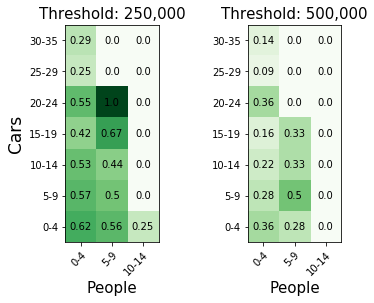

In [676]:
Cars = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-35"]
Cars.reverse()
People = ["0-4", "5-9", "10-14"]

vlue = []
value2 = get_val(objects_25)
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value2[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

fig, (ax1, ax2) = plt.subplots(1,2)
im = ax1.imshow(vlue,cmap="Greens", vmin = 0, vmax = 1)
# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(People)))
ax1.set_yticks(np.arange(len(Cars)))

ax1.set_xticklabels(People)
ax1.set_yticklabels(Cars)
ax1.set_xlabel("People", size=15)
ax1.set_ylabel("Cars", size=17)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cars)):
    for j in range(len(People)):
        text = ax1.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax1.set_title("Threshold: 250,000", size=15)

vlue = []
value = get_val(objects)
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

#fig, ax = plt.subplots()
im = ax2.imshow(vlue,cmap="Greens", vmin = 0, vmax = 1)

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(len(People)))
ax2.set_yticks(np.arange(len(Cars)))

ax2.set_xticklabels(People)
ax2.set_yticklabels(Cars)
ax2.set_xlabel("People", size=15)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cars)):
    for j in range(len(People)):
        text = ax2.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax2.set_title("Threshold: 500,000", size=15)
plt.show()

In [677]:
print(len([n for n in wealthy if n == 1])/len(wealthy))
print(len([n for n in wealthy_25 if n == 1])/len(wealthy_25))

0.3204241585984325
0.5859843245735362
